# **Netflix : Business Case Study - Data Exploration and Visualization**

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

*   Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

**Dataset Link:** https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv


The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

**Show_id:** Unique ID for every Movie / Tv Show

**Type:** Identifier - A Movie or TV Show

**Title:** Title of the Movie / Tv Show

**Director:** Director of the Movie

**Cast:** Actors involved in the movie/show

**Country:** Country where the movie/show was produced

**Date_added:** Date it was added on Netflix

**Release_year:** Actual Release year of the movie/show

**Rating:** TV Rating of the movie/show

**Duration:** Total Duration - in minutes or number of seasons

**Listed_in:** Genre

**Description:** The summary description

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download the dataset**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2024-01-25 18:10:49--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.10, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.2’

netflix.csv.2       100%[===================>]   3.24M  --.-KB/s    in 0.1s    

2024-01-25 18:10:49 (23.8 MB/s) - ‘netflix.csv.2’ saved [3399671/3399671]



In [ ]:
nf = pd.read_csv('netflix.csv', skipinitialspace = True)
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
nf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**Here we observe that the few columns have multiple values. Like we see in the cast column of  first row has mutliple casts being associated with the same show_id. It requires unnesting**


**Checking basic info of the dataset**

In [ ]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Checking the shape of the dataset**

In [ ]:
nf.shape

(8807, 12)

**Checking the statistical attributes for numberical columns**

In [ ]:
nf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
nf.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


**Checking the number of nulls in each attribute**

In [ ]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Percentage of nulls in each column of NetFlix - raw data**

In [ ]:
nf.isnull().sum()/len(nf)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# DATA CLEANING

#To unnest the 'listed_in' column

In [ ]:
listed_in_col = nf['listed_in'].apply(lambda x : str(x).split(',')).tolist()        #  Tolist - converts object of list to nested list


df_listed = pd.DataFrame(listed_in_col , index = nf['title'])
df_listed = pd.DataFrame(df_listed.stack())

df_listed.reset_index(inplace=True)

df_listed = df_listed[['title', 0]]                        # to extract only title and 0 columns from the above df_listed
df_listed.columns=['title', 'genre']                     #  to rename the column 0 to genre

df_listed.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


# To unnest 'cast' column

In [ ]:
cast_col = nf['cast'].apply(lambda x : str(x).split(',')).tolist()          #  Tolist - converts object of list to nested list

df_cast = pd.DataFrame(cast_col , index = nf['title'])
df_cast = pd.DataFrame(df_cast.stack())

df_cast.reset_index(inplace=True)

df_cast= df_cast[['title', 0]]                                            # to extract only title and 0 columns from the above df_cast
df_cast.columns=['title', 'casts']                                    #  to rename the colum 0 to casts

df_cast.head()

,title,casts
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


# To unnest 'director' column

In [ ]:
dir_col = nf['director'].apply(lambda x : str(x).split(',')).tolist()          #  Tolist - converts object of list to nested list

df_dir = pd.DataFrame(dir_col , index = nf['title'])
df_dir = pd.DataFrame(df_dir.stack())

df_dir.reset_index(inplace=True)

df_dir= df_dir[['title', 0]]                                                         # to extract only title and 0 columns from the above df_dir
df_dir.columns=['title', 'directors']                                         #  to rename the colum 0 to directors

df_dir.head()

,title,directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


# To unnest 'country' column

In [ ]:
country_col = nf['country'].apply(lambda x : str(x).split(',')).tolist()          #  Tolist - converts object of list to nested list

df_country = pd.DataFrame(country_col , index = nf['title'])
df_country = pd.DataFrame(df_country.stack())

df_country.reset_index(inplace=True)

df_country= df_country[['title', 0]]                                     # to extract only title and 0 columns from the above df_country
df_country.columns=['title', 'countries']                             #  to rename the colum 0 to countries

df_country.head()

,title,countries
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


# To merge all five dataframes --> nf + df_cast + df_listed + df_dir + df_country

In [ ]:
df = nf.merge(df_cast.merge(df_listed.merge(df_dir.merge(df_country, on ='title'), on ='title'), on ='title'), on ='title')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,casts,genre,directors,countries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,nan,South Africa


# To delete the nested columns ['director', 'cast', 'country', 'listed_in'] from df

In [ ]:
df.drop(['director', 'cast', 'country', 'listed_in'], axis = 1,inplace=True)

In [ ]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,casts,genre,directors,countries
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",nan,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,nan,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas,nan,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries,nan,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,nan,South Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   date_added    201907 non-null  object
 4   release_year  202065 non-null  int64 
 5   rating        201998 non-null  object
 6   duration      202062 non-null  object
 7   description   202065 non-null  object
 8   casts         202065 non-null  object
 9   genre         202065 non-null  object
 10  directors     202065 non-null  object
 11  countries     202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


All the columns are object data type except the 'release_year' which is of integer data type.

In [ ]:
df.shape

(202065, 12)

# To check and replace nulls in df

In [ ]:
df.isnull().sum()

show_id           0
type              0
title             0
date_added      158
release_year      0
rating           67
duration          3
description       0
casts             0
genre             0
directors         0
countries         0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

show_id         0.000000
type            0.000000
title           0.000000
date_added      0.078193
release_year    0.000000
rating          0.033158
duration        0.001485
description     0.000000
casts           0.000000
genre           0.000000
directors       0.000000
countries       0.000000
dtype: float64

# To handle - out of place data in the 'duration' column
**Here for the below three indices the values of the 'duration' column have been misplaced into the 'rating' column.**

In [ ]:
mis = df.loc[df.duration.isna()]                            # focus on the values in 'rating' and 'duration' columns
mis

,show_id,type,title,date_added,release_year,rating,duration,description,casts,genre,directors,countries
126582,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Movies,Louis C.K.,United States
131648,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Movies,Louis C.K.,United States
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...,Louis C.K.,Movies,Louis C.K.,United States


In [ ]:
mis = mis.fillna(method ='pad' , axis=1)
mis['rating'] = np.nan

In [ ]:
df.loc[[126582,131648,131782 ]]            # original df - focus on the columns - rating and duration

,show_id,type,title,date_added,release_year,rating,duration,description,casts,genre,directors,countries
126582,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Movies,Louis C.K.,United States
131648,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Movies,Louis C.K.,United States
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...,Louis C.K.,Movies,Louis C.K.,United States


**Replacing these indexed rows in the original dataframe df**

In [ ]:
df.iloc[126582] = mis.loc[126582].to_list()
df.iloc[131648] = mis.loc[131648].to_list()
df.iloc[131782] = mis.loc[131782].to_list()

df.iloc[[126582,131648,131782 ]]

,show_id,type,title,date_added,release_year,rating,duration,description,casts,genre,directors,countries
126582,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,NaN,74 min,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Movies,Louis C.K.,United States
131648,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,NaN,84 min,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Movies,Louis C.K.,United States
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,NaN,66 min,The comic puts his trademark hilarious/thought...,Louis C.K.,Movies,Louis C.K.,United States


# Handeling nulls in 'rating' column

We are filling the nulls in the rating column by taking the mode

In [ ]:
m_rating= df.rating.mode()[0]
print(m_rating)
df['rating'] = df['rating'].fillna(m_rating)

TV-MA


# Handleing nulls in 'date_added' column

We are filling the nulls in the date_added column by taking the mean

In [ ]:
x = pd.to_datetime(df.date_added, errors = 'coerce')
x.mean()

Timestamp('2019-06-19 13:11:39.951958272')

In [ ]:
df['date_added'] = df['date_added'].fillna(x.mean())

#Now you see that there are no nulls - 'NaN'

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
casts           0
genre           0
directors       0
countries       0
dtype: int64

# To check for the count of  'nan' in each column

In [ ]:
for i in list(df.columns):
    x = df.loc[df[i] == 'nan', i].count()
    print(i ,'\t',  x)

show_id 	 0
type 	 0
title 	 0
date_added 	 0
release_year 	 0
rating 	 0
duration 	 0
description 	 0
casts 	 2149
genre 	 0
directors 	 50643
countries 	 11897


In [ ]:
df['casts'] = df['casts'].replace('nan', 'Unkown Cast')
df['directors'] = df['directors'].replace('nan', 'Unkown Directors')
df['countries'] = df['countries'].replace('nan', 'Unkown Country')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   date_added    202065 non-null  object
 4   release_year  202065 non-null  int64 
 5   rating        202065 non-null  object
 6   duration      202065 non-null  object
 7   description   202065 non-null  object
 8   casts         202065 non-null  object
 9   genre         202065 non-null  object
 10  directors     202065 non-null  object
 11  countries     202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 28.1+ MB


# Change the type of 'date_added' column to datetime

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'].dt.date

0         2021-09-25
1         2021-09-24
2         2021-09-24
3         2021-09-24
4         2021-09-24
             ...    
202060    2019-03-02
202061    2019-03-02
202062    2019-03-02
202063    2019-03-02
202064    2019-03-02
Name: date_added, Length: 202065, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   date_added    202065 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        202065 non-null  object        
 6   duration      202065 non-null  object        
 7   description   202065 non-null  object        
 8   casts         202065 non-null  object        
 9   genre         202065 non-null  object        
 10  directors     202065 non-null  object        
 11  countries     202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 28.1+ MB


# To check for duplicates and drop them

In [ ]:
np.any(df.duplicated())

True

In [ ]:
df.loc[df.duplicated() ==True]

,show_id,type,title,date_added,release_year,rating,duration,description,casts,genre,directors,countries
39354,s1632,Movie,Rust Creek,2020-11-30,2018,R,108 min,A wrong turn in the woods becomes a fight for ...,Micah Hauptman,Thrillers,Jen McGowan,United States
135656,s6014,Movie,300 Miles to Heaven,2019-10-01,1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Dramas,Maciej Dejczer,Denmark
135657,s6014,Movie,300 Miles to Heaven,2019-10-01,1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Dramas,Maciej Dejczer,France
135658,s6014,Movie,300 Miles to Heaven,2019-10-01,1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Dramas,Maciej Dejczer,Poland
135659,s6014,Movie,300 Miles to Heaven,2019-10-01,1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,International Movies,Maciej Dejczer,Denmark
135660,s6014,Movie,300 Miles to Heaven,2019-10-01,1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,International Movies,Maciej Dejczer,France
135661,s6014,Movie,300 Miles to Heaven,2019-10-01,1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,International Movies,Maciej Dejczer,Poland


In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.shape

(202058, 12)

# To trim white spaces in the columns

In [ ]:
c = ['show_id', 'type', 'title', 'rating', 'duration', 'description', 'casts', 'genre', 'directors', 'countries']
for i in c:
   df[i] = df[i].str.strip()

# To check for empty string in the columns

In [ ]:
for i in list(df.columns):
    x = df.loc[df[i] == '', i].count()
    print(i ,'\t',  x)

show_id 	 0
type 	 0
title 	 0
date_added 	 0
release_year 	 0
rating 	 0
duration 	 0
description 	 0
casts 	 0
genre 	 0
directors 	 0
countries 	 106


**'countries' column has 106 empty strings.**

In [ ]:
df['countries'] = df['countries'].replace('', 'Unkown Country')

In [ ]:
for i in list(df.columns):
    x = df.loc[df[i] == '', i].count()
    print(i ,'\t',  x)

show_id 	 0
type 	 0
title 	 0
date_added 	 0
release_year 	 0
rating 	 0
duration 	 0
description 	 0
casts 	 0
genre 	 0
directors 	 0
countries 	 0


# **Now the data is cleaned and ready for exploration   :)**

**Netflix is one of the most popular media and video streaming platforms. They
have over 8000 movies or tv shows available on their platform, as of mid-2021,
they have over 200M Subscribers globally.**

In [ ]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,casts,genre,directors,countries
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unkown Cast,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,Unkown Directors,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas,Unkown Directors,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries,Unkown Directors,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,Unkown Directors,South Africa


In [ ]:
 df.shape

(202058, 12)

**The dataframe now contains 202058 rows and 12 columns.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202058 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202058 non-null  object        
 1   type          202058 non-null  object        
 2   title         202058 non-null  object        
 3   date_added    202058 non-null  datetime64[ns]
 4   release_year  202058 non-null  int64         
 5   rating        202058 non-null  object        
 6   duration      202058 non-null  object        
 7   description   202058 non-null  object        
 8   casts         202058 non-null  object        
 9   genre         202058 non-null  object        
 10  directors     202058 non-null  object        
 11  countries     202058 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.0+ MB


In [ ]:
df.describe()

,release_year
count,202058.000000
mean,2013.449653
std,9.012781
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
show_id,202058,8807,s7165,700
type,202058,2,Movie,145910
title,202058,8806,Kahlil Gibran's The Prophet,700
rating,202058,14,TV-MA,73985
duration,202058,220,1 Season,35035
description,202058,8775,A troubled young girl and her mother find sola...,700
casts,202058,36440,Unkown Cast,2149
genre,202058,42,Dramas,29803
directors,202058,4994,Unkown Directors,50643
countries,202058,123,United States,59349


In [ ]:
df['type'].value_counts(normalize= True)*100

Movie      72.211939
TV Show    27.788061
Name: type, dtype: float64

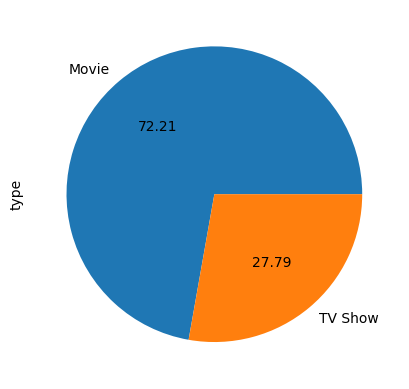

In [ ]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

**Insight**


*   Almost 72 % of the Netflix platform streams movies than those of the TV shows which is only 28 %

**Recommendation**

*   Hence the platform can include more number of fascinating and adventerous TV shows and well advertise them to attract the viewers which inturn improves the number of subscribers.

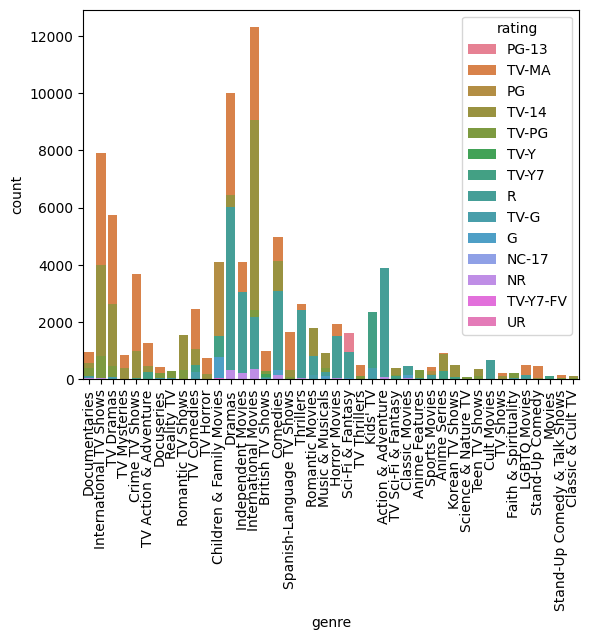

In [ ]:
sns.countplot(data=df, x='genre', hue ='rating',dodge = False)
plt.xticks(rotation=90)
plt.show()

**Insights :**

*   In the above stacked plot, we can visualize the composition of ratings in each genre

# **PROBLEMS**

# **Q1. Find the counts of each categorical variable both using graphical and non-graphical analysis.**

**a. For Non-graphical Analysis:**


**b. For graphical analysis:**



In [ ]:
x = list(df.columns)
x

['show_id',
 'type',
 'title',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'description',
 'casts',
 'genre',
 'directors',
 'countries']

**Defining a function to count the values in each category of a column.**

In [ ]:
def count_cat(cols):
    return(cols.value_counts())

**Defining a function to plot the graph of countplot of a column.**

In [ ]:
def gplot(col):
    return sns.countplot(data=df, x =col)

#**Solution 1a : For Non - Graphical analysis**

**The analysis is non-graphical because of large data present in these columns.**


**It includes the following columns.**


**1.   show_id**

**2.   title**

**3.   duration**

**4.   description**

**5.   casts**

**6.   directors**


**1. show_id**

In [ ]:
count_cat(df['show_id'])

s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s6330      1
s8176      1
s937       1
s3387      1
s1         1
Name: show_id, Length: 8807, dtype: int64

**2. title column**

In [ ]:
count_cat(df['title'])

Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Blackfish                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: title, Length: 8806, dtype: int64

**3. duration column**

In [ ]:
count_cat(df['duration'])

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

**4. description column**

In [ ]:
count_cat(df['description'])

A troubled young girl and her mother find solace on a journey with a subversive poet whose words captivate their hearts and imaginations.                   700
Eight gleefully grim short tales set on Halloween, Mother's Day, St. Patrick's Day and other holidays comprise this chilling horror anthology.              504
An eye-popping cast stars in this sketch-comedy collage, the new millennium's homage to classic anthology films like The Kentucky Fried Movie.              468
The owner of a Paris jazz club gets tangled up with dangerous criminals as he fights to protect his business, his band and his teenage daughter.            416
The true story of Colombia's infamously violent and powerful drug cartels fuels this gritty gangster drama series.                                          378
                                                                                                                                                           ... 
Chris D'Elia takes the stage in Minneapo

**5. casts column**

In [ ]:
count_cat(df['casts'])

Unkown Cast        2149
Liam Neeson         161
Alfred Molina       160
John Krasinski      139
Salma Hayek         130
                   ... 
Peter Dunning         1
Drew Ray Tanner       1
Rena Strober          1
Valerie Arem          1
Jenelle Evans         1
Name: casts, Length: 36440, dtype: int64

**6. directors column**

In [ ]:
count_cat(df['directors'])

Unkown Directors       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Brendon Marotta            1
Charlie Siskel             1
Adam Bolt                  1
Anthony Palmer             1
Kirsten Johnson            1
Name: directors, Length: 4994, dtype: int64

#**Solution 1b : For Graphical analysis**
**It includes the following columns.**


**1.   type**

**2.   date_added**

**3.   release_year**

**4.   ratings**

**5.   genre**

**6.   countries**



**1. type column**


In [ ]:
count_cat(df['type'])

Movie      145910
TV Show     56148
Name: type, dtype: int64

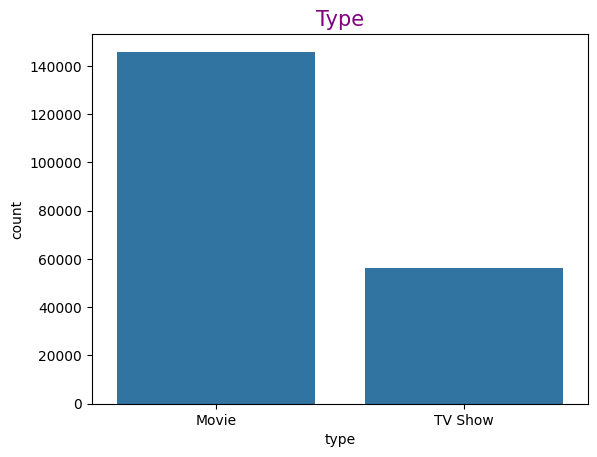

In [ ]:
gplot('type')
plt.title('Type' , color ='purple', fontsize=15)
plt.show()

**2. date_added column**


In [ ]:
min(df['date_added']), max(df['date_added'])

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-09-25 00:00:00'))

**The data given is from 01-2008 to 09-2021**

**The range is 13 years 9 months**

In [ ]:
count_cat(df['date_added'])

2020-01-01    3748
2019-11-01    2258
2021-07-01    2219
2017-10-01    1899
2021-09-01    1756
              ... 
2019-06-10       1
2017-01-24       1
2020-11-18       1
2017-01-23       1
2021-09-25       1
Name: date_added, Length: 1715, dtype: int64

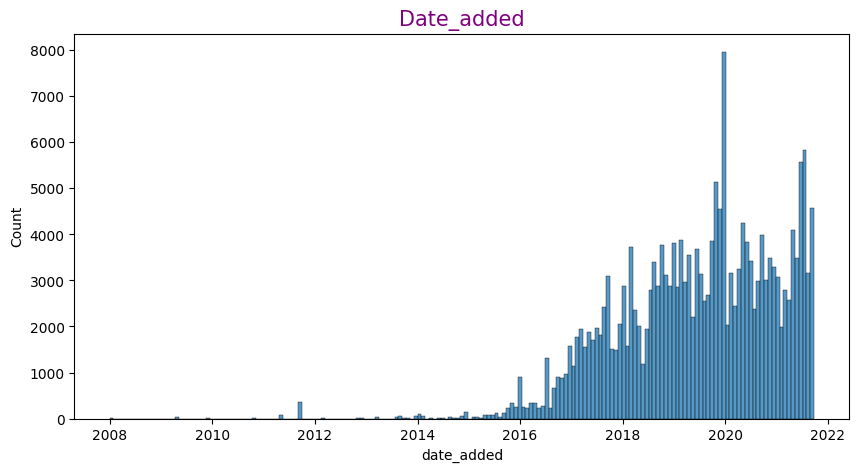

In [ ]:
plt.figure(figsize=(10,5))

sns.histplot(data=df , x ='date_added')
plt.title('Date_added', color= 'purple', fontsize=15)
plt.show()

**Insight :**

1.   From the graph it is observed that maximum number of movies / tv shows were added in the year 2020.
2.   Minimal number of movies / tv shows were added untill the year 2015. Thereafter there was an exponential increase till 2020.
3.   Again there was a slight drop in the year 2021 and raised in the year 2022.

**3. release_year column**


In [ ]:
count_cat(df['release_year'])

2018    24440
2019    21931
2017    20516
2020    19697
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

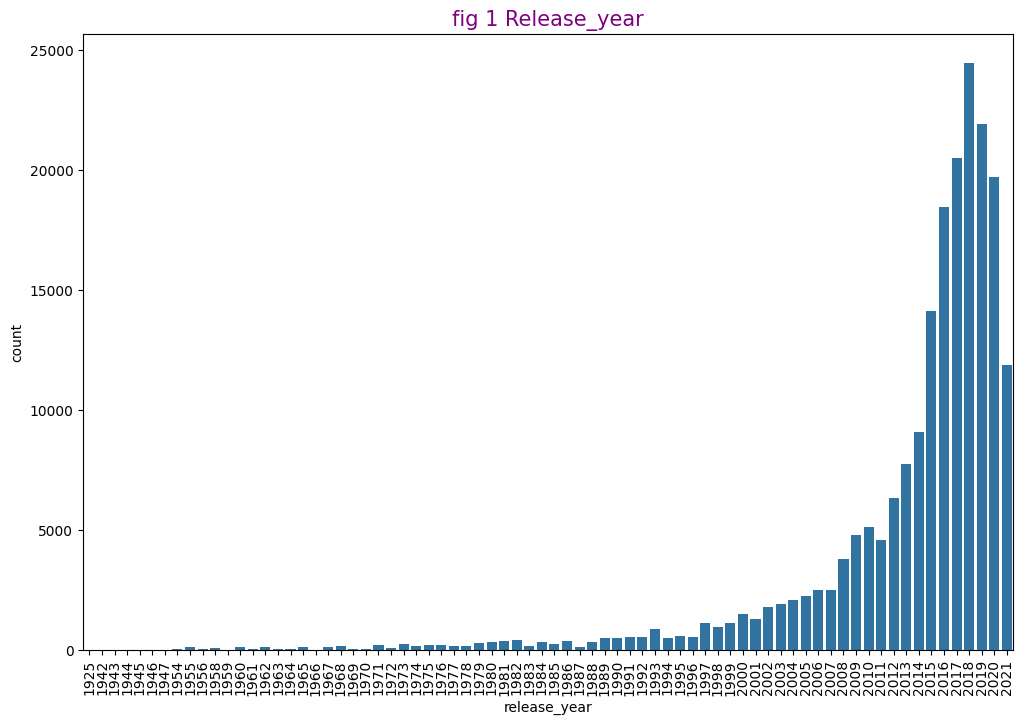

In [ ]:
plt.figure(figsize=(12,8))

gplot('release_year')
plt.title('fig 1 Release_year' , color ='purple',  fontsize=15)
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'fig 2 Release year'}, ylabel='release_year'>

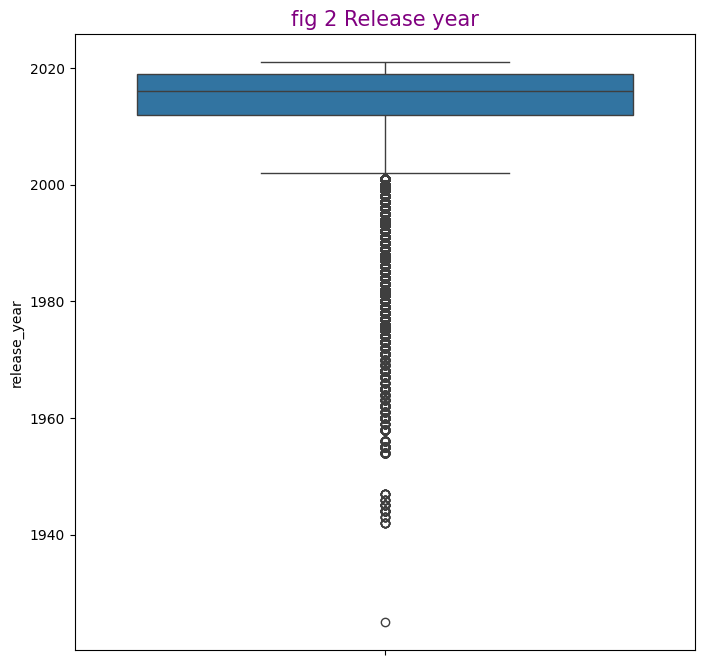

In [ ]:
plt.figure(figsize=(8,8))
plt.title('fig 2 Release year', color = 'purple', fontsize = 15)
sns.boxplot(data=df, y = 'release_year')

**Insights :**

1.   From fig1, the number of movies released were elevated exponentially from 1990s till 2018.
2.   From fig1 ,after 2018 there was a slight decrease in the number of movies released.
3.   From fig2 i.e., from the box plot we can see many outliers lying before the year 2000.

**4. ratings column**


In [ ]:
count_cat(df['rating'])

TV-MA       73985
TV-14       43951
R           25859
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

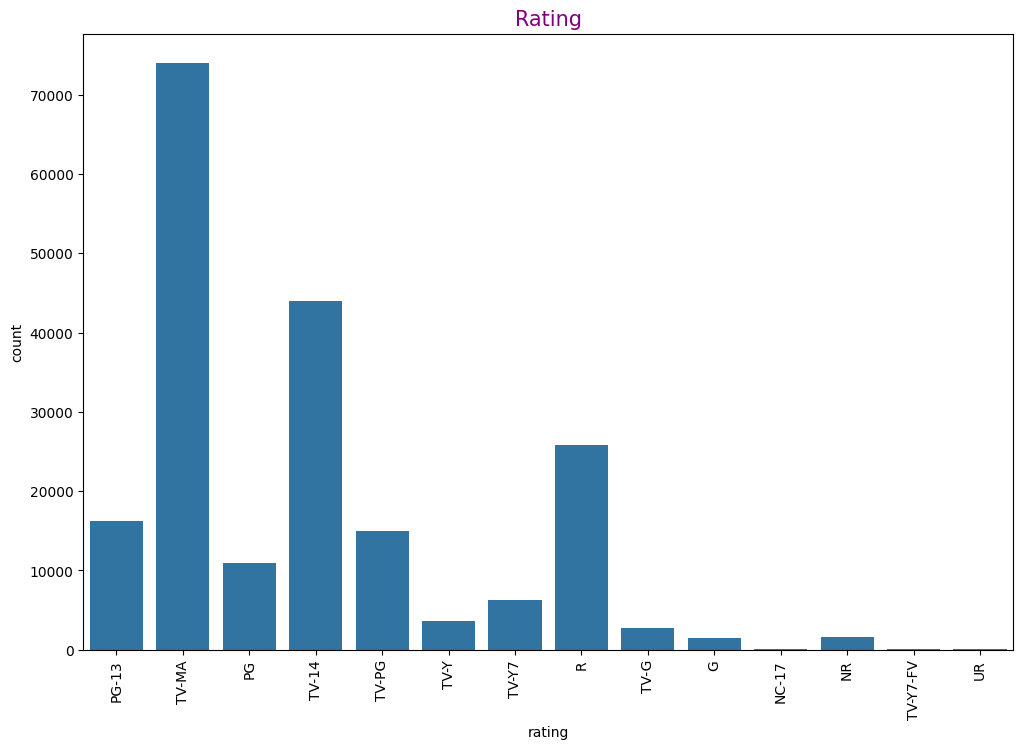

In [ ]:
plt.figure(figsize=(12,8))

gplot('rating')
plt.title('Rating' , color ='purple',  fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Insights :**


*   The rating 'TV_MA' has the highest count while 'TV-Y7-FV' and 'UR' have the least count.



**5. genre column**


In [ ]:
count_cat(df['genre'])

Dramas                          29803
International Movies            28240
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7106
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2409
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1443
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

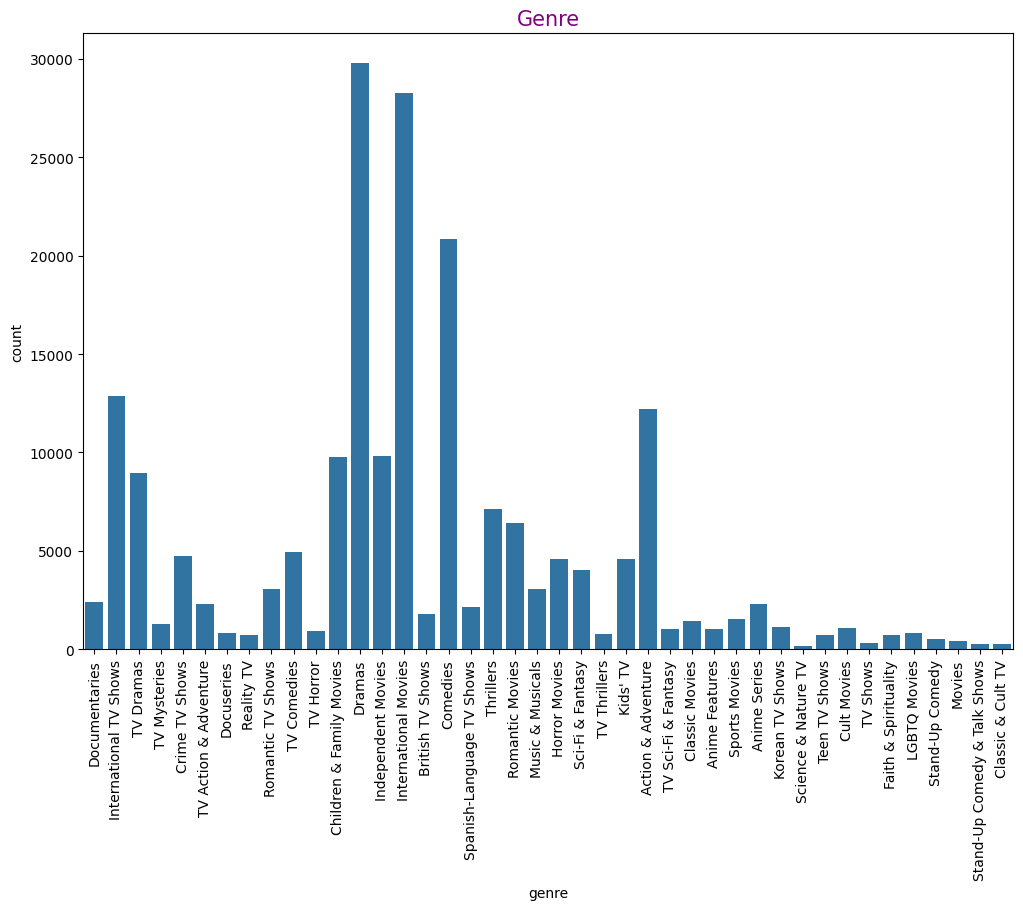

In [ ]:
plt.figure(figsize=(12,8))

gplot('genre')
plt.title('Genre' , color = 'purple',  fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Insights :**

1.   From the plot it is evident that 'Dramas' , 'International movies', and 'Comedies' are the top 3 genres.
2.   The genres 'Classic & Cult TV', 'Stand-Up Comedy & Talk Shows' and 'Science & Nature TV' are in the bottom 3.      

**6. countries column**

In [ ]:
count_cat(df['countries'])

United States     59349
India             22814
United Kingdom    12965
Unkown Country    12003
Japan              8679
                  ...  
Mongolia              2
Armenia               2
Kazakhstan            1
Nicaragua             1
Uganda                1
Name: countries, Length: 123, dtype: int64

United States     59349
India             22814
United Kingdom    12965
Unkown Country    12003
Japan              8679
                  ...  
Uruguay             177
Bulgaria            173
Kenya               166
Peru                139
Vietnam             134
Name: countries, Length: 61, dtype: int64


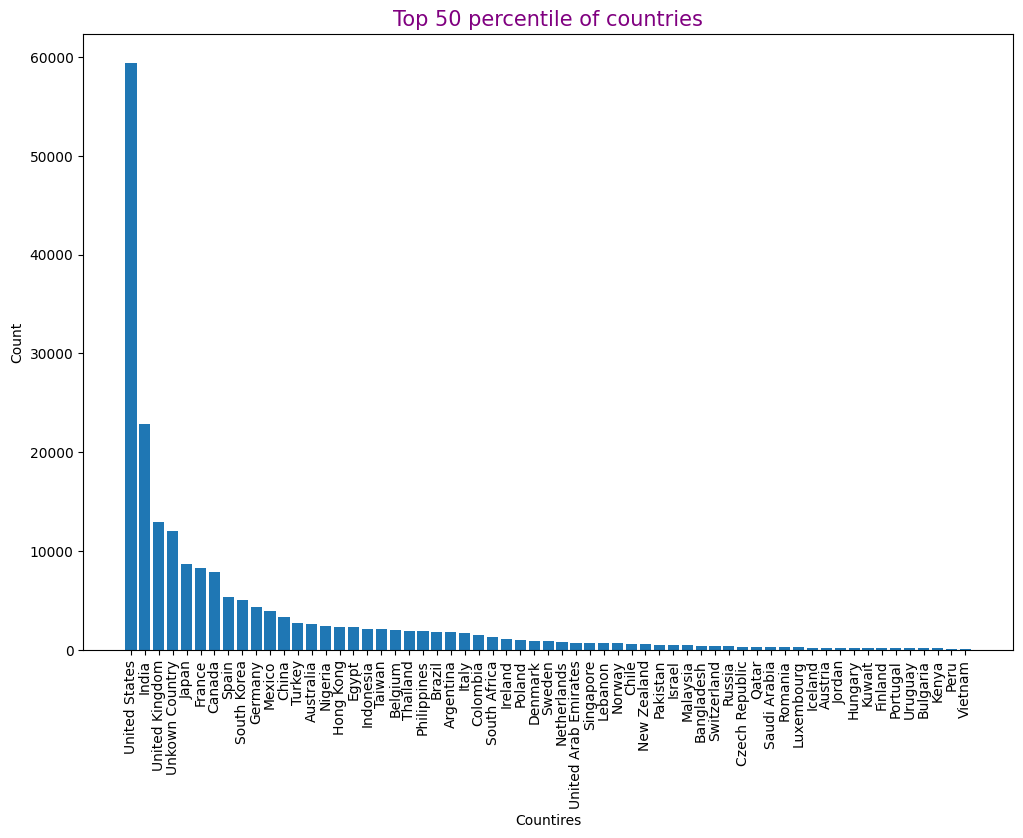

In [ ]:
# Top 50 percentile of the countries

c = count_cat(df['countries'])[count_cat(df['countries']) > count_cat(df['countries']).median()]
print(c)

plt.figure(figsize=(12,8))
plt.bar(c.index,c)
plt.xticks(rotation = 90)
plt.title('Top 50 percentile of countries' , color ='purple',  fontsize=15)
plt.xlabel('Countires')
plt.ylabel('Count')
plt.show()

**Insights :**

* The above graph is a plot of top 50 percentile of the countries that produce more number of movies / tv shows.
* The 'United States' is the only country while is outstanding in producing more number of movies / tv shows.
* 'India' takes the second position and 'UK' the third.

# Glimpse of Graphs for question number 1

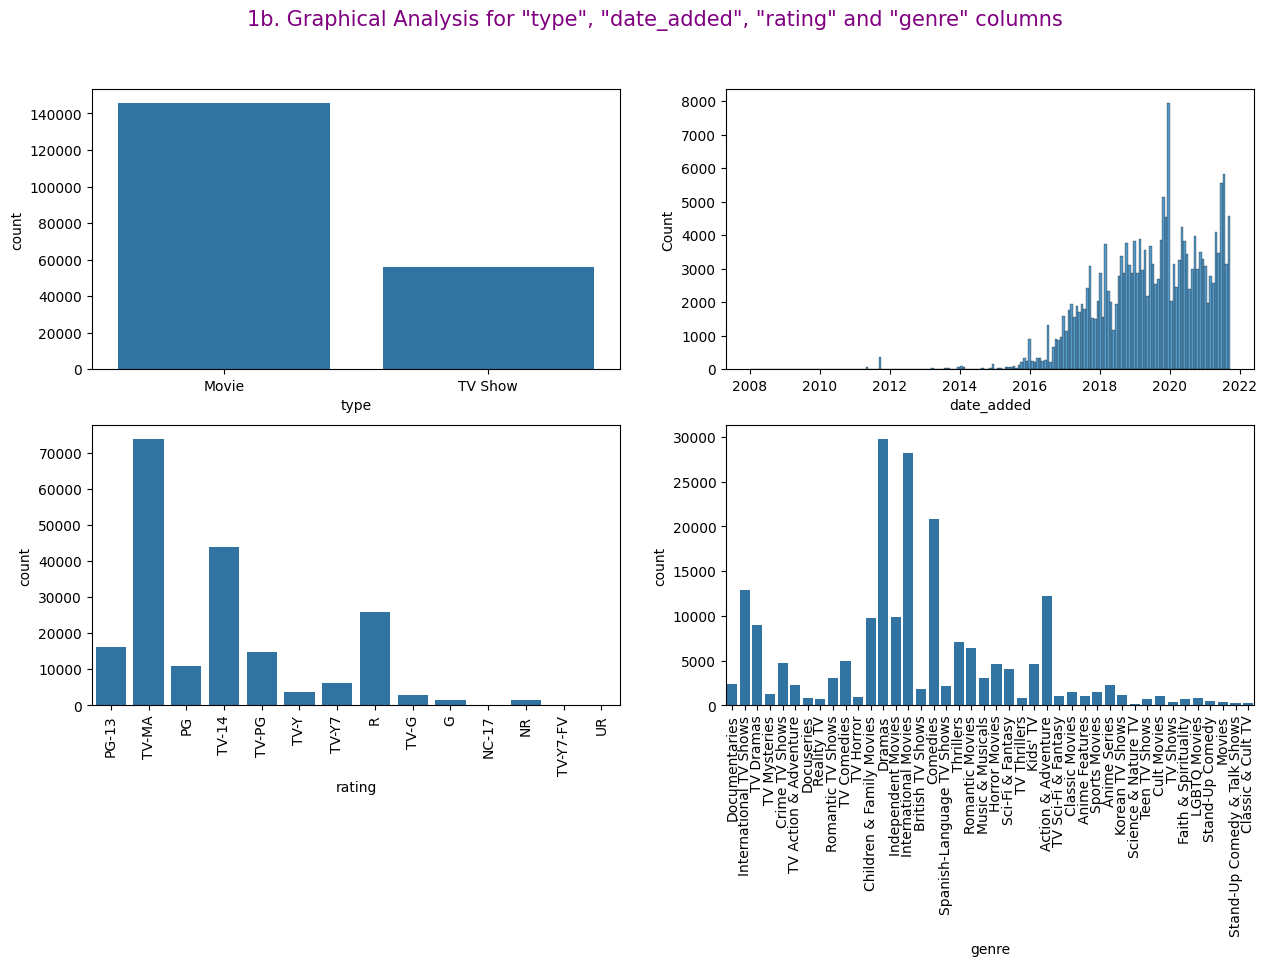

In [ ]:
plt.subplots(2,2, figsize =(15,8))
plt.suptitle('1b. Graphical Analysis for "type", "date_added", "rating" and "genre" columns', color= 'purple',  fontsize=15)

plt.subplot(2,2,1)
gplot('type')

plt.subplot(2,2,2)
sns.histplot(data=df, x='date_added')

plt.subplot(2,2,3)
gplot('rating')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
gplot('genre')
plt.xticks(rotation=90)
plt.show()

# **Q2. Comparison of tv shows vs. movies.**

**a. Find the number of movies produced in each country and pick the top 10
countries.**

**b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.**


**To filter the dataset of movies and TV shows separately**

In [ ]:
movies = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

#**Solution 2a : Top 10 countries that produce more movies**

In [ ]:
top_10_con_m = movies.groupby(['countries'])['title'].nunique().sort_values(ascending = False).head(11)
top_10_con_m.drop('Unkown Country',inplace = True)
top_10_con_m = top_10_con_m.reset_index()
top_10_con_m

,countries,title
0,United States,2752
1,India,962
2,United Kingdom,534
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


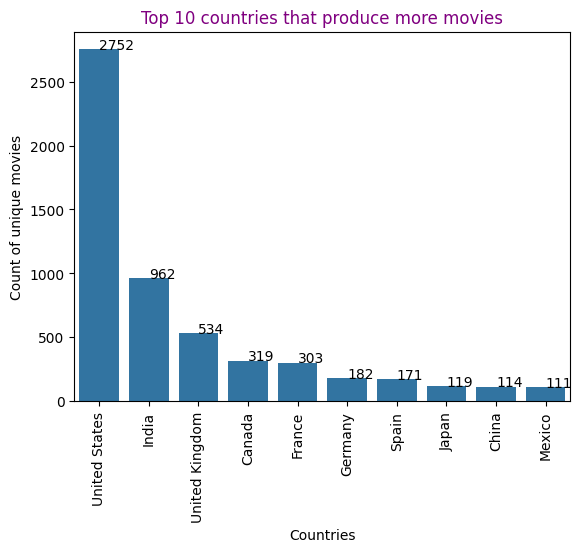

In [ ]:
sns.barplot(data = top_10_con_m, x = 'countries', y = 'title')
plt.xticks(rotation = 90)
plt.title('Top 10 countries that produce more movies' , color = 'purple',  fontsize=15)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])


plt.xlabel('Countries')
plt.ylabel('Count of unique movies')
plt.title('Top 10 countries that produce more movies' , color = 'purple')
addlabels(top_10_con_m['countries'], top_10_con_m['title'])
plt.show()

**Insights**

*   The United States has the highest number of 2752 movies produced.
*   The second highest number of movies were produced by India which is about 962 movies .
*   According to the above plot the rest of the countries have produced less than 600 movies so far.


#**Solution 2b : Top 10 countries that produce more TV Shows**

In [ ]:
top_10_con_tv = tv_shows.groupby(['countries'])['title'].nunique().sort_values(ascending = False).head(11)
top_10_con_tv.drop('Unkown Country',inplace = True)
top_10_con_tv = top_10_con_tv.reset_index()
top_10_con_tv

,countries,title
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,66
9,Spain,61


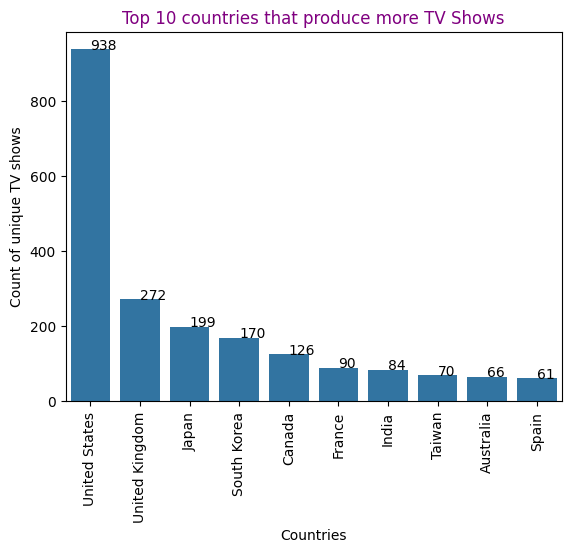

In [ ]:
sns.barplot(data = top_10_con_tv, x = 'countries', y = 'title')
plt.xticks(rotation = 90)
plt.title('Top 10 countries that produce more TV Shows' , color = 'purple',  fontsize=15)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])


plt.xlabel('Countries')
plt.ylabel('Count of unique TV shows')
plt.title('Top 10 countries that produce more TV Shows' , color = 'purple')
addlabels(top_10_con_tv['countries'], top_10_con_tv['title'])
plt.show()

**Insights**

*   The  United States has the highest number of 938 TV shows produced.
*   According to the above plot the rest of the countries have produced less than 400 TV Shows so far.

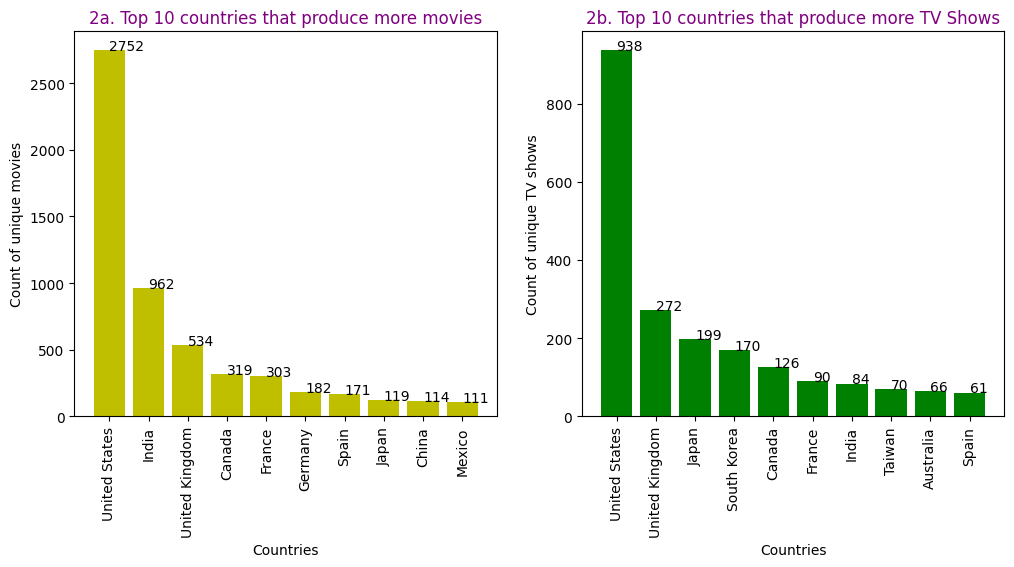

In [ ]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

x = top_10_con_m['countries']
y = top_10_con_m['title']
plt.bar(x, y, color = 'y')
plt.xticks(rotation = 90)

plt.xlabel('Countries')
plt.ylabel('Count of unique movies')
plt.title('2a. Top 10 countries that produce more movies' , color = 'purple')

addlabels(x, y)


plt.subplot(1,2,2)

x = top_10_con_tv['countries']
y = top_10_con_tv['title']
plt.bar(x, y, color = 'g')
plt.xticks(rotation = 90)

plt.xlabel('Countries')
plt.ylabel('Count of unique TV shows')
plt.title('2b. Top 10 countries that produce more TV Shows' , color = 'purple')

addlabels(x, y)
plt.show()

# **Q3. What is the best time to launch a TV show?**

**a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies**


**b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies**



#**Solution 3a : for movies**

In [ ]:
# 3a.(i) --  For movies dataset
movies['week'] = movies['date_added'].dt.week
mov_week = movies.groupby('week')['title'].nunique().sort_values(ascending = False).reset_index()
mov_week.columns = ['week', 'number of movies']
mov_week.head(10)

<ipython-input-81-0e58025f9720>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  movies['week'] = movies['date_added'].dt.week
<ipython-input-81-0e58025f9720>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['week'] = movies['date_added'].dt.week


,week,number of movies
0,1,316
1,44,243
2,40,215
3,9,207
4,26,195
5,35,189
6,31,185
7,13,174
8,18,173
9,27,154


In [ ]:
# Highest movie released week
mov_week.iloc[0]

week                  1
number of movies    316
Name: 0, dtype: int64

#**Solution 3a : for TV shows**

In [ ]:
# 3a.(ii)  -- For TV_Shows dataset
tv_shows['week'] = tv_shows['date_added'].dt.week
tvs_week = tv_shows.groupby('week')['title'].nunique().sort_values(ascending = False).reset_index()
tvs_week.columns = ['week', 'number of tv_shows']
tvs_week['number of tv_shows'].astype(int)
tvs_week['week'].astype(float)
tvs_week.head(10)

<ipython-input-83-9eb6905f3e84>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  tv_shows['week'] = tv_shows['date_added'].dt.week
<ipython-input-83-9eb6905f3e84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['week'] = tv_shows['date_added'].dt.week


,week,number of tv_shows
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,5,73
7,26,73
8,40,72
9,50,70


In [ ]:
 # highest tv_show released week
tvs_week.iloc[0]

week                  27
number of tv_shows    86
Name: 0, dtype: int64

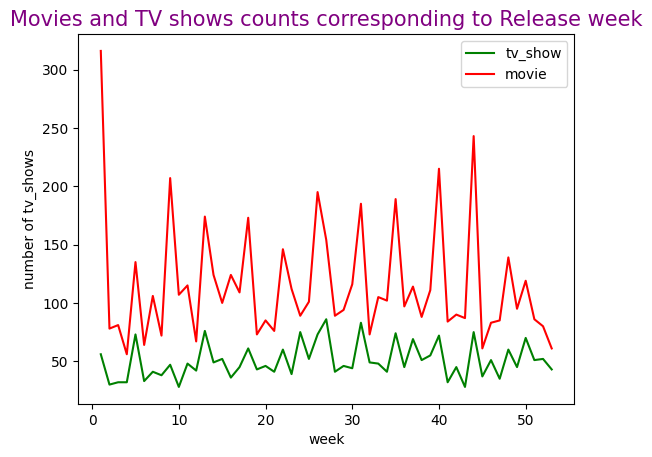

In [ ]:
sns.lineplot(x='week',y='number of tv_shows',data=tvs_week, color='g',label='tv_show')
sns.lineplot(x='week',y='number of movies',data=mov_week,color='r',label='movie')
plt.title('Movies and TV shows counts corresponding to Release week', color ='purple', fontsize =15)
plt.show()

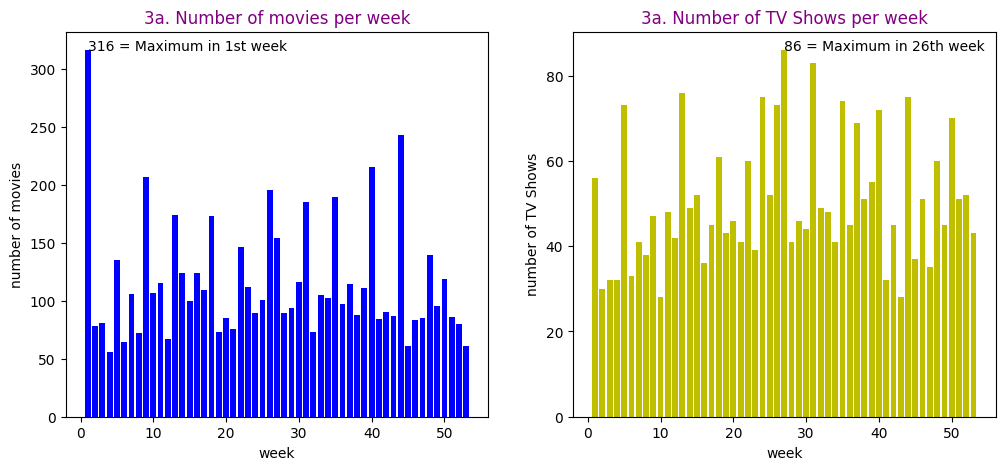

In [ ]:
plt.subplots(1,2,figsize=(12,5))

# movies per week
plt.subplot(1,2,1)

x = mov_week['week']
y = mov_week['number of movies']
plt.bar(x,y, color = 'b')
plt.xlabel('week')
plt.ylabel('number of movies')
plt.title('3a. Number of movies per week', color= 'purple')
plt.text(1,316,'316 = Maximum in 1st week')

# tv shows per week
plt.subplot(1,2,2)

x = tvs_week['week']
y = tvs_week['number of tv_shows']
plt.bar(x,y, color = 'y')
plt.xlabel('week')
plt.ylabel('number of TV Shows')
plt.title('3a. Number of TV Shows per week', color= 'purple')
plt.text(27,86,'86 = Maximum in 26th week')
plt.show()


**Insights :**

*   From both the above graphs we can conclude that the rate of variation is quite evident.

**1. Movies**
*   The highest number of movies were released during the 1st week of the year and from the above query we see that 316 movies were released in this week.

*   All over the country people are more relaxed and interested to watch movies in the first week of January as they can easily find leisure time during this eve of  'New Year'.

*   Hence the best week to release a movie is the 1st week of the year.

**2. TV Shows**


*   the highest number of TV Shows were released during the 27th week of the year and from the above query we see that 27 TV Shows were released in this week.

*   An equivalently greater number of TV Shows were released in the week of 31, 13, 44, and 24.

*   Hence my suggestion would be the weeks 27, 31, and 13 being the best time to release the TV Shows.





#**Solution 3b : for movies**

In [ ]:
# 3b.(i)   --  For movie dataset
movies['month'] = movies['date_added'].dt.month
mov_m = movies.groupby('month')['title'].nunique().sort_values(ascending = False).reset_index()
mov_m.columns = ['month', 'number of movies']
mov_m.head(10)

<ipython-input-87-0458ff709ae7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['month'] = movies['date_added'].dt.month


,month,number of movies
0,7,565
1,4,550
2,12,547
3,1,546
4,10,544
5,3,529
6,8,519
7,9,519
8,11,498
9,6,492


In [ ]:
# Highest movie released month
mov_m.head(1)

,month,number of movies
0,7,565


#**Solution 3b : for TV shows**

In [ ]:
# 3b.(ii)  --  For TV_Shows  dataset
tv_shows['month'] = tv_shows['date_added'].dt.month
tvs_m = tv_shows.groupby('month')['title'].nunique().sort_values(ascending = False).reset_index()
tvs_m.columns = ['month', 'number of tv_shows']
tvs_m.head(10)

<ipython-input-89-44a82884bbf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['month'] = tv_shows['date_added'].dt.month


,month,number of tv_shows
0,12,266
1,7,262
2,9,251
3,6,246
4,8,236
5,10,215
6,4,214
7,3,213
8,11,207
9,5,193


In [ ]:
# Highest tv show released month
tvs_m.head(1)

,month,number of tv_shows
0,12,266


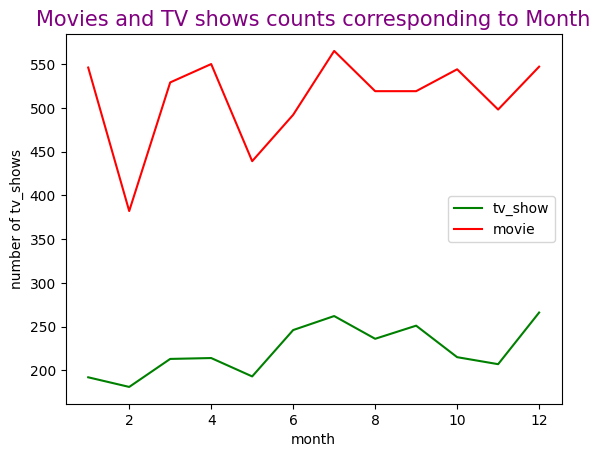

In [ ]:
sns.lineplot(x='month',y='number of tv_shows',data=tvs_m, color='g',label='tv_show')
sns.lineplot(x='month',y='number of movies',data=mov_m,color='r',label='movie')
plt.title('Movies and TV shows counts corresponding to Month', color ='purple', fontsize =15)
plt.show()

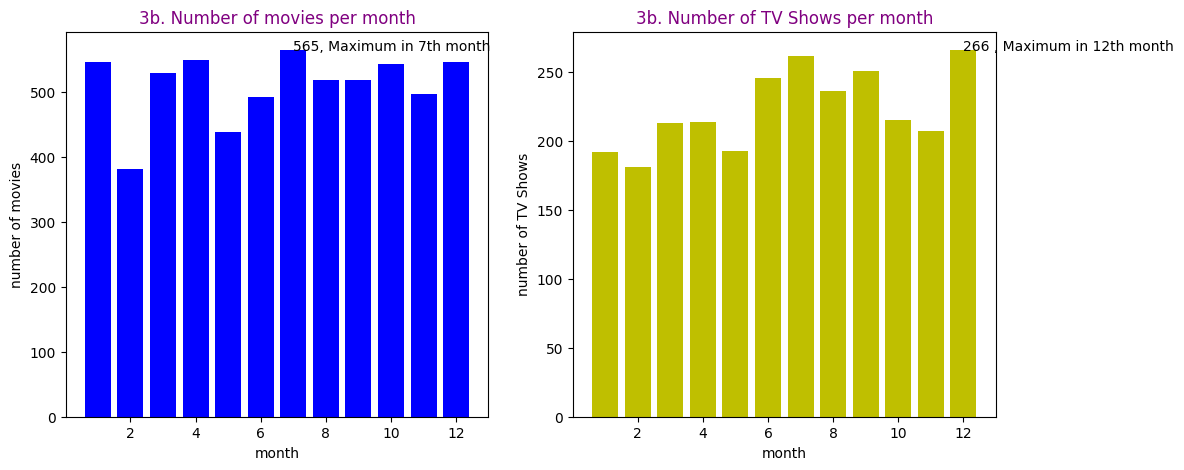

In [ ]:
plt.subplots(1,2,figsize =(12,5))

# movies per month
plt.subplot(1,2,1)

x = mov_m['month']
y = mov_m['number of movies']
plt.bar(x,y, color = 'b')
plt.xlabel('month')
plt.ylabel('number of movies')
plt.title('3b. Number of movies per month', color= 'purple')
plt.text(7,565,'565, Maximum in 7th month')

# tv shows per month
plt.subplot(1,2,2)

x = tvs_m['month']
y = tvs_m['number of tv_shows']
plt.bar(x,y, color = 'y')
plt.xlabel('month')
plt.ylabel('number of TV Shows')
plt.title('3b. Number of TV Shows per month', color= 'purple')
plt.text(12,266,'266 , Maximum in 12th month')
plt.show()

**Insights :**

**1. Movies**

*   From the graph it is observed that the rate of variation is not very high.
*   But still I would rather prefer the months July, April, December, January, and October  have comparatively greater numbers of movies released.

**2. TV Shows**

*   From the graph it is observed that the rate of variation is not very high.
*   But still I would rather prefer the months December, July, September, June, and August have comparatively greater numbers of tv shows released.

# **Q4. Analysis of actors/directors of different types of shows/movies.**

**a. Identify the top 10 actors who have appeared in most movies or TV shows.**


**b. Identify the top 10 directors who have appeared in most movies or TV shows.**

#**Solution 4a : Top 10 actors**

In [ ]:
# 4a. Top 10 actors

top_actr = df.groupby('casts')['title'].nunique().sort_values(ascending = False).reset_index()
top_actr.columns = ['casts', 'number of movies / tv shows']
top_10_actr = top_actr[1:11]                     # We omit index 0 being the 'unkown cast' which has the maximum number of movies / tv shows.
top_10_actr

,casts,number of movies / tv shows
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Takahiro Sakurai,32
5,Naseeruddin Shah,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29
10,Paresh Rawal,28


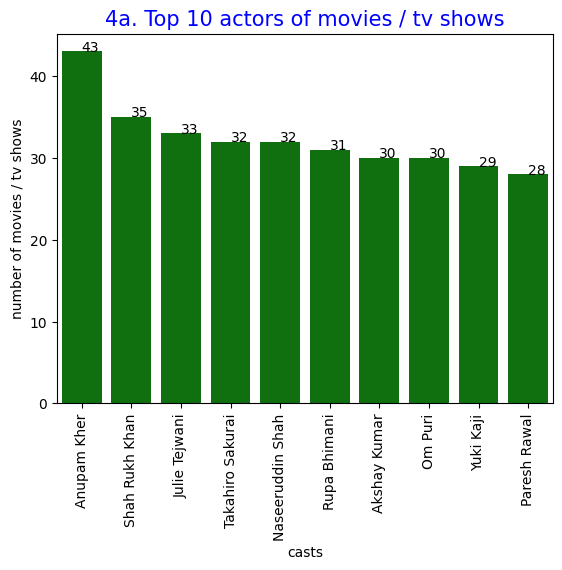

In [ ]:
sns.barplot(data= top_10_actr, x = 'casts' , y = 'number of movies / tv shows', color='green')
plt.xticks(rotation = 90)
plt.title('4a. Top 10 actors of movies / tv shows' , color = 'b',  fontsize=15)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

x = list(top_10_actr['casts'])
y = list(top_10_actr['number of movies / tv shows'])
addlabels(x, y)

**Insights :**

*   The above gives us the top 10 most appeared actors in movies / tv shows.



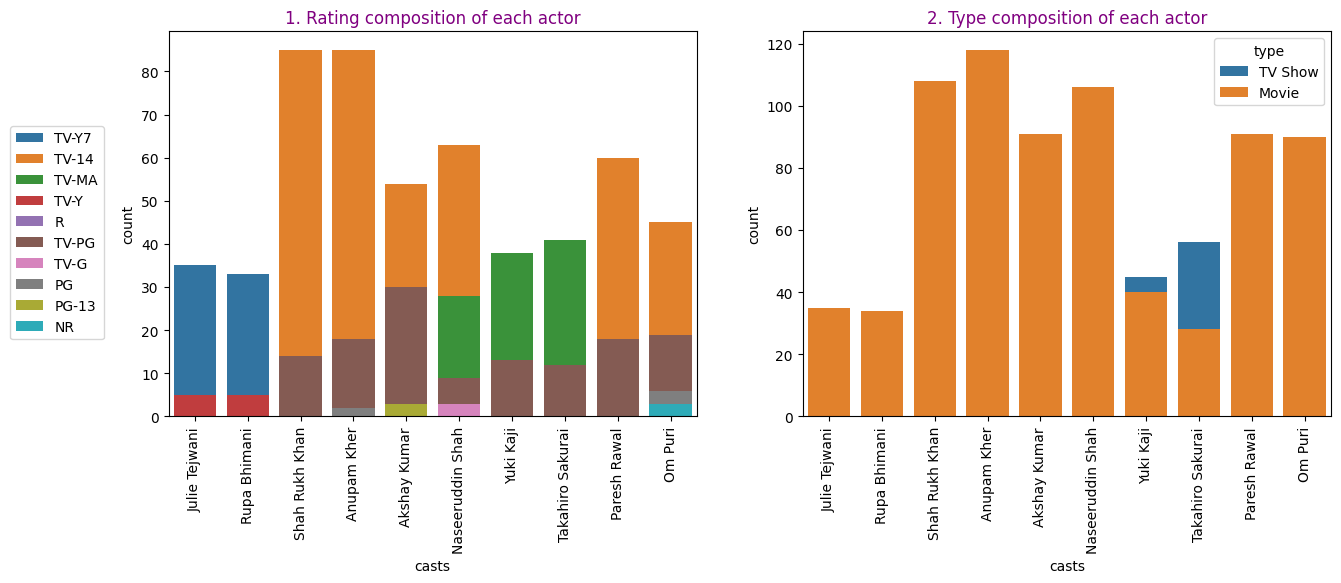

In [ ]:
df1 = df.loc[df['casts'].isin(top_10_actr['casts'])]

plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='casts',hue='rating',data=df1, dodge =False)
plt.title('1. Rating composition of each actor', color = 'purple')
plt.xticks(rotation=90)
plt.legend(loc=(-0.3,0.2))

plt.subplot(1,2,2)
sns.countplot(x='casts',hue='type',data=df1, dodge =False)
plt.title('2. Type composition of each actor', color = 'purple')
plt.xticks(rotation=90)

plt.show()

**Insights :**

**1.Fig 1**
*    It represents the composition of 'rating' for each of the top 10 actors who appeared in most of movies / tv shows.
*    It is observed that,out of these top 10 actors each of them is associated with a least of 2 and maximum of 4 categories of rating.

**2.Fig 2**
*    It represents the composition of 'type' for each of the top 10 actors who appeared in most of movies / tv shows.
*    It is seen that,out of these top 10 actors only 'Yuki Kaji' and 'Takahiro Sakurai' acts in both movies and tv shows, the rest of them are associated with only movies.

#**Solution 4b : Top 10 directors**

In [ ]:
# 4b. Top 10 directors

top_dir = df.groupby('directors')['title'].nunique().sort_values(ascending = False).reset_index()
top_dir.columns = ['directors', 'number of movies / tv shows']
top_10_dir = top_dir[1:11]                                       # We omit index 0 being the 'unkown director' which has the maximum number of movies / tv shows.
top_10_dir

,directors,number of movies / tv shows
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


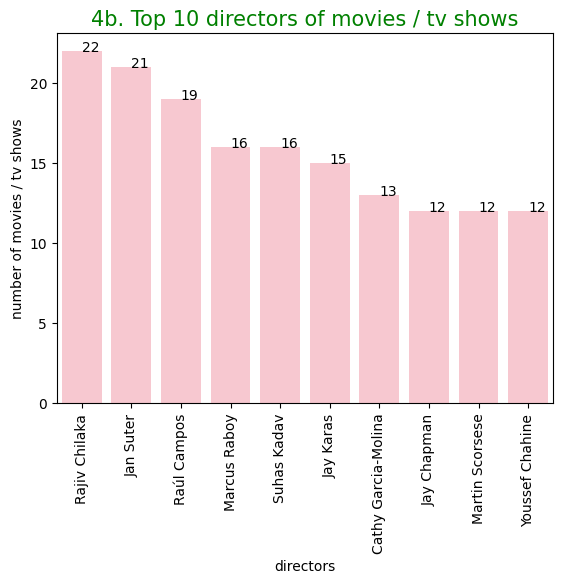

In [ ]:
sns.barplot(data= top_10_dir, x = 'directors' , y = 'number of movies / tv shows', color='pink')
plt.xticks(rotation = 90)
plt.title('4b. Top 10 directors of movies / tv shows' , color = 'g',  fontsize=15)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

x = list(top_10_dir['directors'])
y = list(top_10_dir['number of movies / tv shows'])
addlabels(x, y)

**Insights :**

*   The above gives us the top 10 most appeared directors in movies / tv shows.



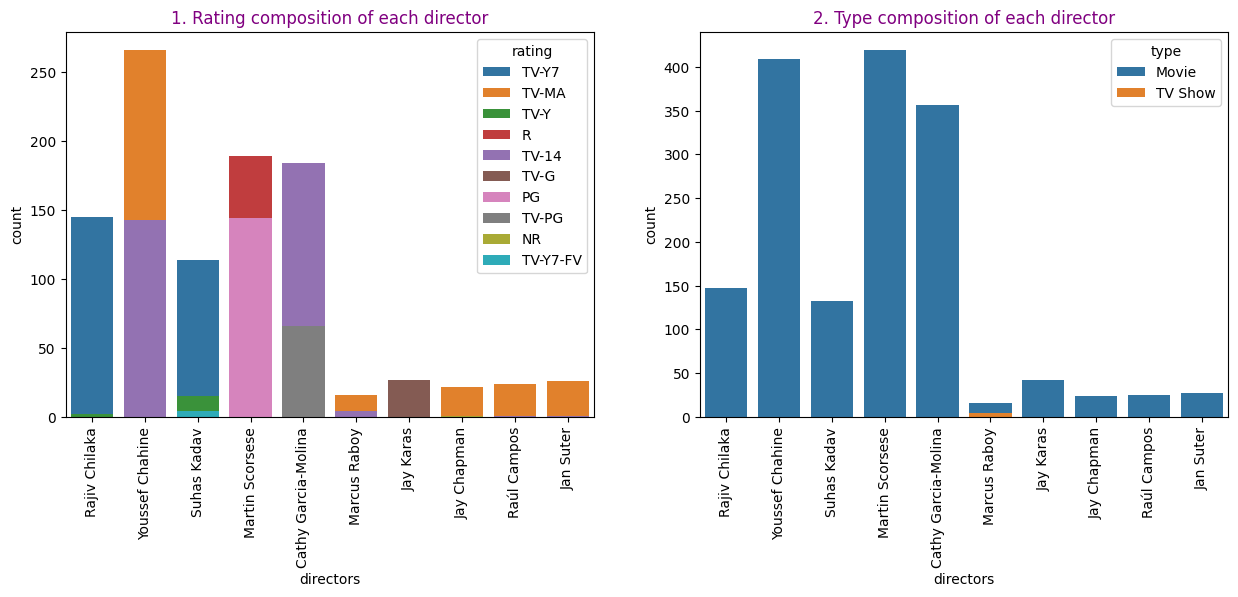

In [ ]:
df2 = df.loc[df['directors'].isin(top_10_dir['directors'])]

plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='directors',hue='rating',data=df2, dodge =False)
plt.title('1. Rating composition of each director', color = 'purple')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot(x='directors',hue='type',data=df2, dodge =False)
plt.title('2. Type composition of each director', color = 'purple')
plt.xticks(rotation=90)
plt.show()

**Insights :**

**1.Fig 1**
*    It represents the composition of 'rating' for each of the top 10 directors associated in most of movies / tv shows.
*    It is observed that,out of these top 10 directors each of them is associated with a least of 1 and maximum of 3 categories of rating.

**2.Fig 2**
*    It represents the composition of 'type' for each of the top 10 directors associated in most of movies / tv shows.
*    It is seen that,out of these top 10 directors only 'Marcus Raboy' directs both movies and tv shows, the rest of them are associated in directing only movies.

# **Q5. Which genre movies are more popular or produced more**


#**Solution 5:**

In [ ]:
top_genres = movies.genre.value_counts().reset_index()
top_genres.columns = ['genres', 'count of genres']
top_10_genres = top_genres.head(10)
top_10_genres

,genres,count of genres
0,Dramas,29803
1,International Movies,28240
2,Comedies,20829
3,Action & Adventure,12216
4,Independent Movies,9834
5,Children & Family Movies,9771
6,Thrillers,7106
7,Romantic Movies,6412
8,Horror Movies,4571
9,Sci-Fi & Fantasy,4037


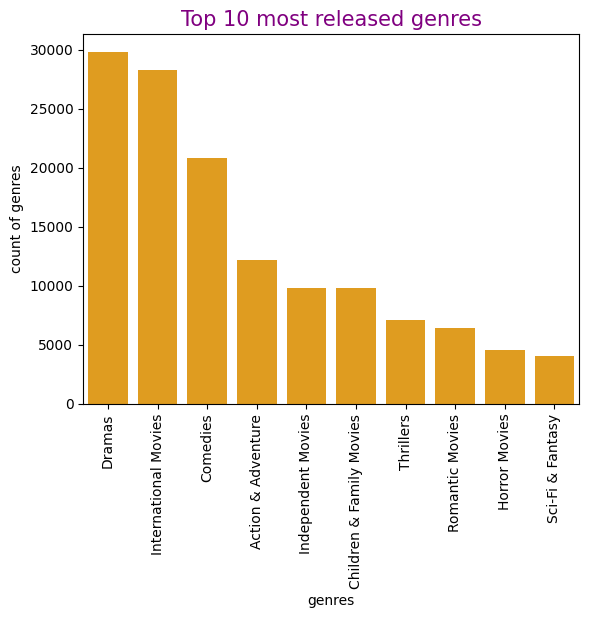

In [ ]:
x = top_10_genres['genres']
y = top_10_genres['count of genres']


sns.barplot(data=top_10_genres , x='genres' , y='count of genres',color = 'orange')
plt.title('Top 10 most released genres', color = 'purple' , fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Insights :**

*    The above graph represents the top most 10 most released genres.    
*     'Dramas' is the top performing genre, followed by 'International Movies' and 'Comedies'.

In [ ]:
from collections import Counter

# Generate a word frequency distribution
word_freq = Counter()

for text in df['genre']:
    word_freq.update(text.split())

# Display the 10 most common words
print(word_freq.most_common(14))

[('Movies', 64129), ('TV', 52722), ('International', 41085), ('Dramas', 38745), ('&', 33850), ('Shows', 27030), ('Comedies', 25792), ('Action', 14504), ('Adventure', 14504), ('Independent', 9834), ('Children', 9771), ('Family', 9771), ('Romantic', 9461), ('Thrillers', 7874)]


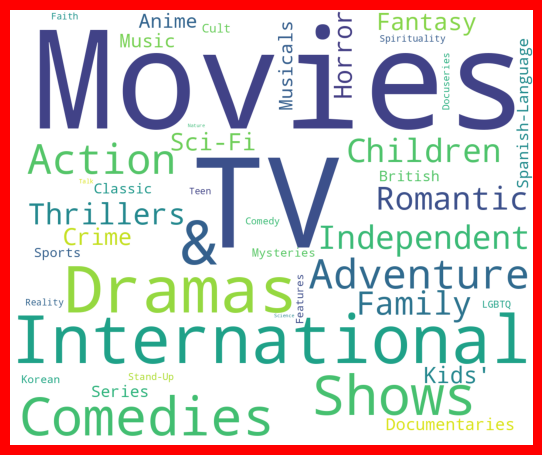

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1200, height=1000, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor='red')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=10)

plt.show()

**The above is a word cloud of top genres.**

# **Q6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**


#**Solution 6 :**

**1. To add a new column named 'release_date' based on the column 'release_year'.**

**2. To add a new column named 'added_year' based on the column 'date_added'.**

In [ ]:
x = list(movies['release_year'].astype('str'))
movies['release_date'] = [i+'-01-01' for i in x]
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['added_year'] = movies['date_added'].dt.year
movies.head()

<ipython-input-103-85fe9a6141af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_date'] = [i+'-01-01' for i in x]
<ipython-input-103-85fe9a6141af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_date'] = pd.to_datetime(movies['release_date'])
<ipython-input-103-85fe9a6141af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,show_id,type,title,date_added,release_year,rating,duration,description,casts,genre,directors,countries,week,month,release_date,added_year
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unkown Cast,Documentaries,Kirsten Johnson,United States,38,9,2020-01-01,2021
159,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Children & Family Movies,Robert Cullen,Unkown Country,38,9,2021-01-01,2021
160,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Children & Family Movies,José Luis Ucha,Unkown Country,38,9,2021-01-01,2021
161,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Children & Family Movies,Robert Cullen,Unkown Country,38,9,2021-01-01,2021
162,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Children & Family Movies,José Luis Ucha,Unkown Country,38,9,2021-01-01,2021


In [ ]:
movies['difference_date'] = movies['date_added'] - movies['release_date']
movies['difference_date']

<ipython-input-104-db031cf42b98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['difference_date'] = movies['date_added'] - movies['release_date']


0         633 days
159       266 days
160       266 days
161       266 days
162       266 days
            ...   
202060   1521 days
202061   1521 days
202062   1521 days
202063   1521 days
202064   1521 days
Name: difference_date, Length: 145910, dtype: timedelta64[ns]

In [ ]:
movies.head()

,show_id,type,title,date_added,release_year,rating,duration,description,casts,genre,directors,countries,week,month,release_date,added_year,difference_date
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unkown Cast,Documentaries,Kirsten Johnson,United States,38,9,2020-01-01,2021,633 days
159,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Children & Family Movies,Robert Cullen,Unkown Country,38,9,2021-01-01,2021,266 days
160,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Vanessa Hudgens,Children & Family Movies,José Luis Ucha,Unkown Country,38,9,2021-01-01,2021,266 days
161,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Children & Family Movies,Robert Cullen,Unkown Country,38,9,2021-01-01,2021,266 days
162,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Kimiko Glenn,Children & Family Movies,José Luis Ucha,Unkown Country,38,9,2021-01-01,2021,266 days


In [ ]:
movies['difference_date'].mode()

0   1369 days
Name: difference_date, dtype: timedelta64[ns]

**Insights :**

We can conclude that, after the movie is released it takes on average of 1369 days to be added to the NetFlix platform.


**Insights :**

•	Almost 72 % of the Netflix platform streams movies than those of the TV shows which is only 28 %

•	It is observed that a maximum number of movies/TV shows were added in the year 2020.

•	Minimal number of movies/TV shows were added until the year 2015. Thereafter there was an exponential increase till 2020.

•	The number of movies released was elevated exponentially from the 1990s till 2018, after 2018 there was a slight decrease in the number of movies released.

•	The rating 'TV_MA' has the highest count while 'TV-Y7-FV' and 'UR' have the lowest count.

•	It is evident that 'Dramas', 'International movies', and 'Comedies' are the top 3 genres, and the genres of 'Classic & Cult TV', 'Stand-Up Comedy & Talk Shows' and 'Science & Nature TV' are in the bottom 3.

•	The 'United States' is the only country that is outstanding in producing more number of movies/TV shows. 'India' takes the second position and 'UK' the third.

•	We can conclude that, after the movie is released it takes an average of 1369 days to be added to the NetFlix platform.

•	Out of the top 10 actors only 'Yuki Kaji' and 'Takahiro Sakurai' acts in both movies and tv shows, the rest of them are associated with only movies.

**Movies :**

•	The United States has the highest number of 2752 movies produced. The second highest number of movies were produced by India which is about 962 movies. The rest of the countries have produced less than 600 movies so far.

•	The highest number of movies were released during the 1st week of the year and from the above query we see that 316 movies were released this week.

•	All over the country people are more relaxed and interested in watching movies in the first week of January as they can easily find leisure time during this eve of 'New Year'.

•	The months July, April, December, January, and October have comparatively greater numbers of movies released.

**TV shows :**

•	The United States has the highest number of 938 TV shows produced. The rest of the countries have produced less than 400 TV Shows so far.

•	The highest number of TV Shows were released during the 27th week of the year and from the above query we see that 27 TV Shows were released in this week.

•	An equivalently greater number of TV Shows were released in the week of 31, 13, 44, and 24.

•	The months of December, July, September, June, and August which has a comparatively greater number of tv shows released.



**RECOMMENDATIONS :**

**1. Content Type Focus:**

*   Since approximately 72% of the Netflix platform streams movies compared to only 28% for TV shows, Netflix may consider continuing to focus on producing a diverse range of high-quality movies.
*   Evaluate the performance of existing TV shows and consider producing content that aligns with user preferences.

**2. Optimal Release Time:**

*   For movies, consider releasing them during the 1st week of the year, as this appears to be a peak time when people are more relaxed and interested in watching movies, especially during the New Year celebration.
*   For TV shows, focus on releasing them during the 27th, 31st, and 13th weeks of the year, as these weeks have shown higher release numbers. Plan content accordingly to capitalize on these periods.

***3. Genre Preferences:**

*   Pay attention to user preferences for genres, with a particular emphasis on producing more content in the top three genres: Dramas, International Movies, and Comedies.
*   Consider exploring opportunities in genres with lower counts, such as Classic & Cult TV, Stand-Up Comedy & Talk Shows, and Science & Nature TV, to diversify the content library.

**4. International Expansion:**

*   Given that the United States is the leading producer of content, explore opportunities to expand content production in other countries, especially in regions like India and the UK, which have shown substantial production numbers.

**5. Strategic Months for Content Releases:**

*   Strategically plan content releases, with a focus on months like July, April, December, January, October (for movies) and December, July, September, June, August (for TV shows), as these months have seen a higher number of releases.

**6. Optimizing TV Ratings:**

*   Given that 'TV_MA' has the highest count, continue producing content with this rating, but also explore opportunities to diversify and cater to different audience segments by incorporating other TV ratings.

**7. Efficient Content Addition:**

*   Optimize the process of adding content to the Netflix platform. Analyze the trends in the addition of movies and TV shows over the years and identify patterns to streamline the content addition process.

**8. Data-Driven Decision Making:**

*   Encourage a culture of data-driven decision-making within the organization. Regularly analyze viewership data, user feedback, and market trends to adapt content strategy in real-time.

**9. Content Duration Analysis:**

*   Analyze the data to understand whether users prefer shorter or longer content. Consider experimenting with content duration to cater to different viewer preferences.

**10.Collaborations and Partnerships:**

*   Explore collaborations and partnerships with directors, actors, and producers who have shown success in producing popular content. Strategic collaborations can enhance the quality and appeal of Netflix's content library.

#**Thank You**

